# Earnings

Based on [the Stan `earnings` example](https://github.com/stan-dev/example-models/blob/master/ARM/Ch.6/earnings2.stan).

```r
lm (log_earnings ~ height + male)
```

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats as st

from utils import plt, sns

In [2]:
df = pd.read_csv("../data/earnings.csv")
df["log_earnings"] = np.log(df.earnings)
df["male"] = 2 - df.sex

df.head()

,earnings,education,height,height1,height2,hispanic,race,sex,yearbn,log_earnings,male
0,50000,16,74,6,2,2,1,1,45,10.819778,1
1,60000,16,66,5,6,2,1,2,32,11.002100,0
2,30000,16,64,5,4,2,1,2,61,10.308953,0
3,50000,16,63,5,3,2,3,2,99,10.819778,0
4,51000,17,63,5,3,2,1,2,51,10.839581,0


In [3]:
with pm.Model() as model:
    # Priors
    intercept = pm.Normal("intercept", mu=0, sd=10)
    height = pm.Normal("height", mu=0, sd=10)
    sex = pm.Normal("sex", mu=0, sd=10)

    sigma = pm.HalfCauchy("sigma", 2.5)

    theta = intercept                  \
          + height * df.height.values  \
          + sex * df.sex.values

    # Likelihood
    log_earnings = pm.Normal("log_earnings", mu=theta, sd=sigma,
                             observed=df.log_earnings.values)
    # Sample
    trace = pm.sample(draws=6000, njobs=4, chain=4)

burn_in = 2000
trace = trace[burn_in:]

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -1,578: 100%|██████████| 200000/200000 [00:17<00:00, 11692.73it/s]   
Finished [100%]: Average ELBO = -1,575.1
100%|██████████| 6000/6000 [01:32<00:00, 65.06it/s] 



intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  8.943            0.721            0.017            [7.577, 10.399]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  7.503          8.461          8.940          9.433          10.336


height:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.021            0.009            0.000            [0.003, 0.040]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.003          0.015          0.021          0.028          0.040


sex:

  Mean             SD               MC Error         95% HPD interval
  --------------------

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112ef0790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1172642d0>]], dtype=object)

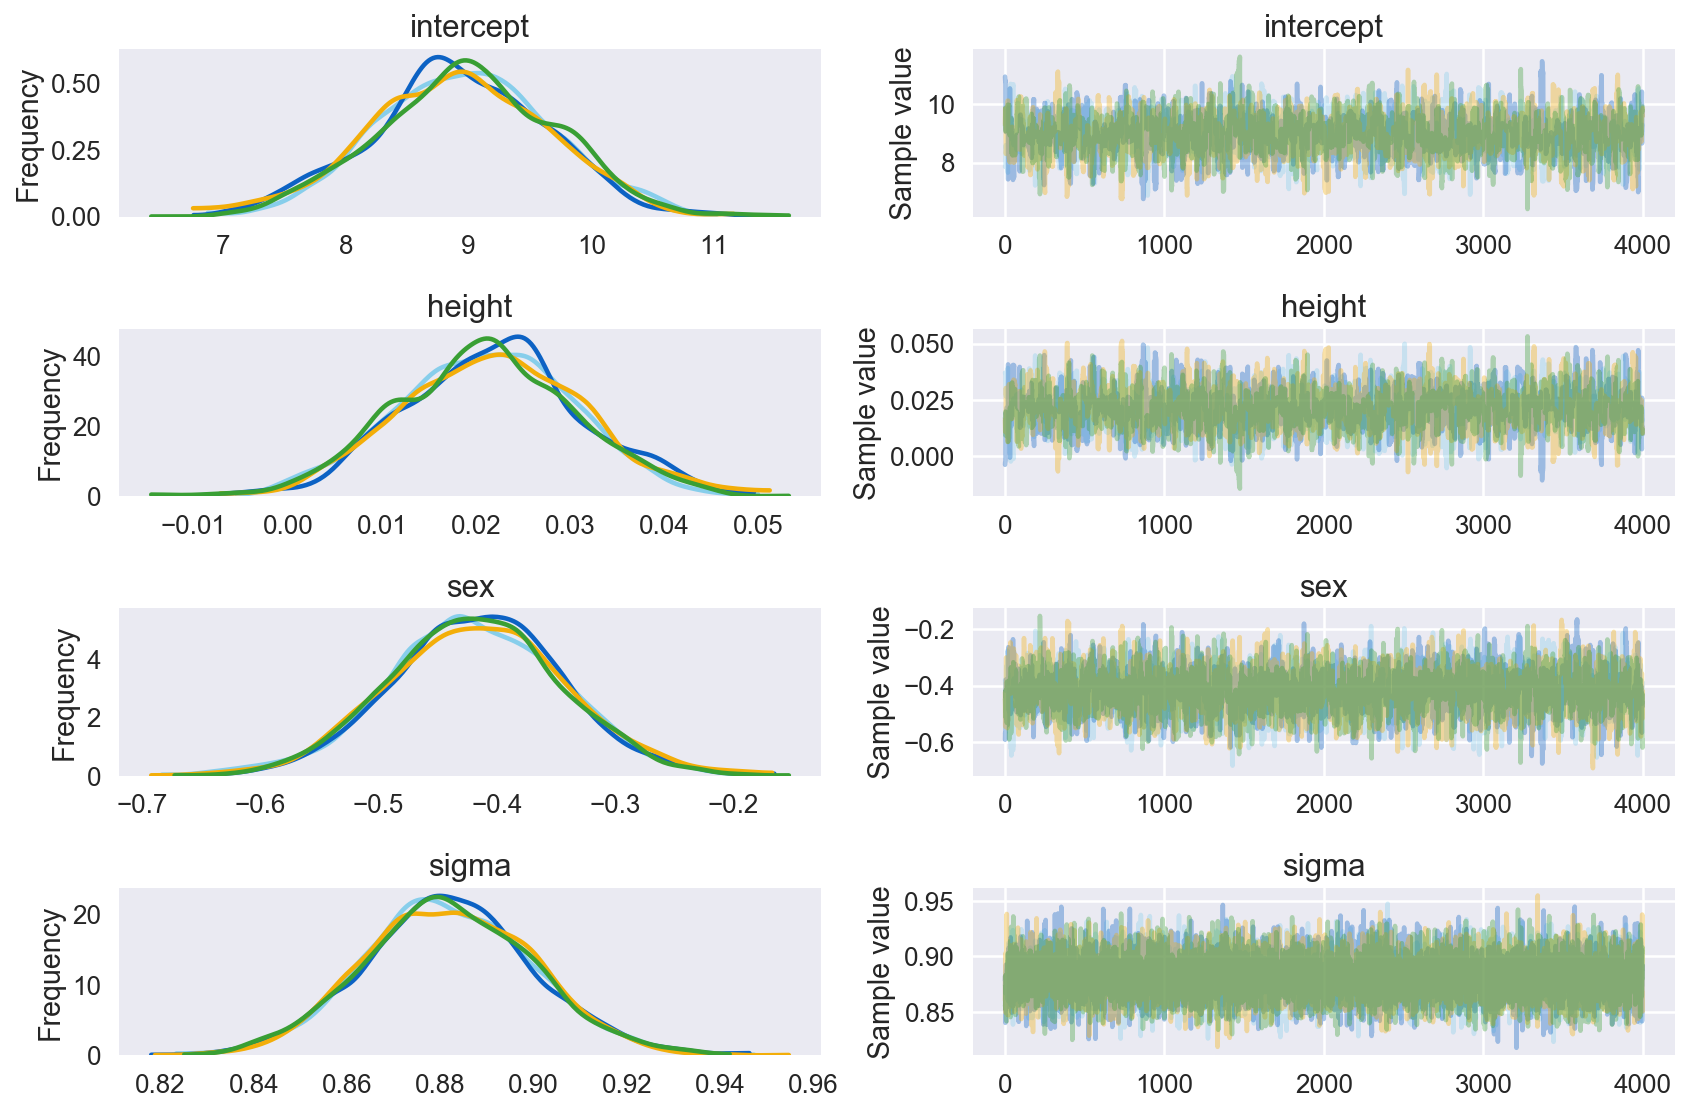

In [4]:
print(pm.summary(trace))
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1197456d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117b7c310>], dtype=object)

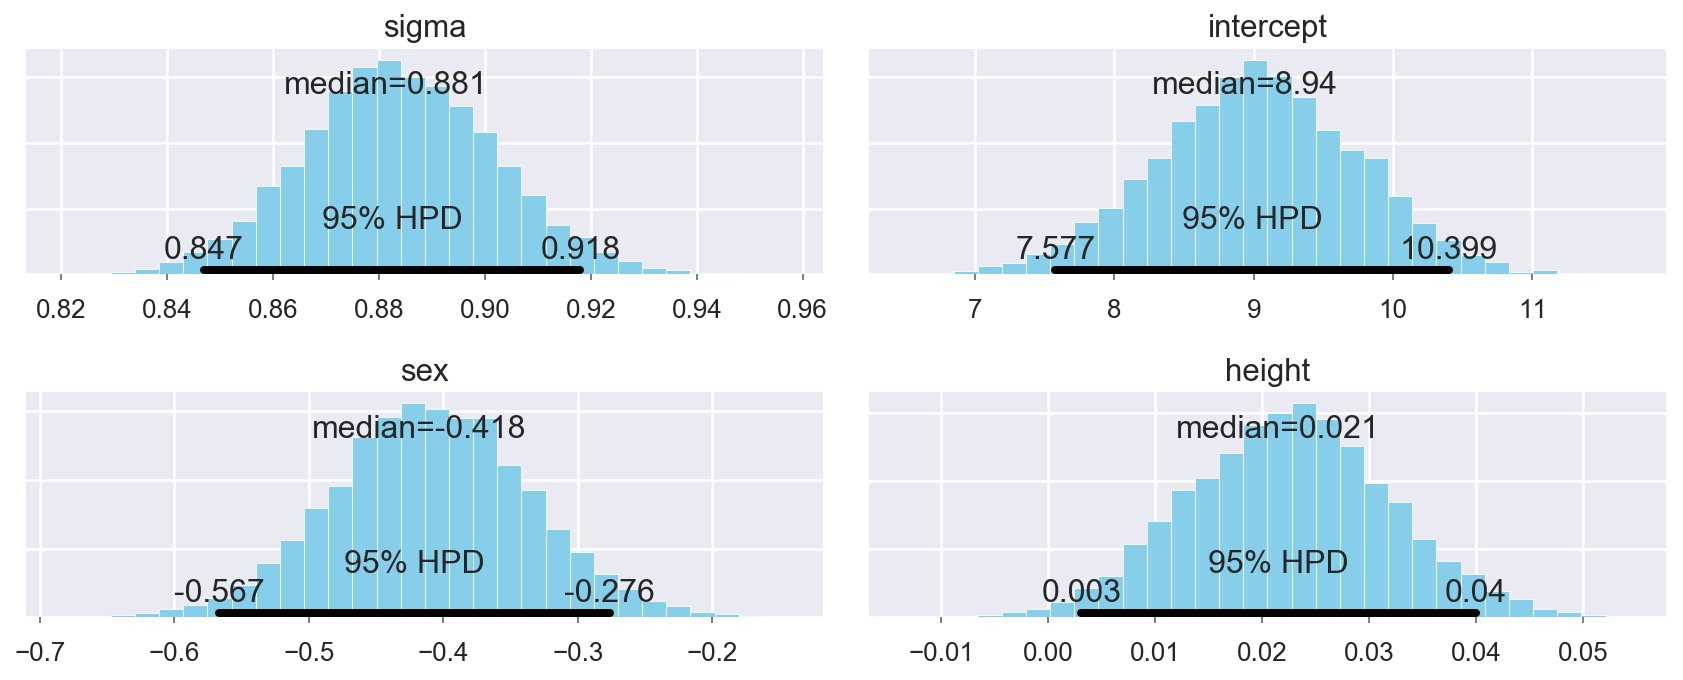

In [5]:
pm.plot_posterior(trace, point_estimate="median")

In [6]:
pm.diagnostics.gelman_rubin(trace)

{'height': 1.0018628936778351,
 'intercept': 1.0017652268495039,
 'sex': 1.0004500750778338,
 'sigma': 1.0000007222415481,
 'sigma_log_': 0.99999831607429179}